In [0]:
!pip install -q kaggle

In [0]:
from google.colab import files

## Download Datasets from Kaggle

In [39]:
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle.json': b'{"username":"bagavijit418","key":"3f41d3ce9ed526c93793d1fe4766d234"}'}

In [40]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
! cp kaggle.json ~/.kaggle/

In [0]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [43]:
! kaggle datasets list

ref                                                           title                                                size  lastUpdated          downloadCount  
------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
mehdidag/black-friday                                         Black Friday                                          5MB  2018-07-25 20:49:48          21873  
spscientist/students-performance-in-exams                     Students Performance in Exams                         8KB  2018-11-09 18:25:25           7220  
szamil/who-suicide-statistics                                 WHO Suicide Statistics                              307KB  2018-08-29 21:23:11           5430  
iarunava/happy-house-dataset                                  Happy House Dataset                                   7MB  2018-09-07 06:33:10           1367  
kaggle/kaggle-survey-2018                           

In [44]:
!kaggle datasets download -d moltean/fruits

fruits.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
! unzip fruits.zip -d downloaded_datasets

Archive:  fruits.zip
   creating: downloaded_datasets/fruits-360/
  inflating: downloaded_datasets/fruits-360/LICENSE  
   creating: downloaded_datasets/fruits-360/papers/
  inflating: downloaded_datasets/fruits-360/readme.md  
   creating: downloaded_datasets/fruits-360/test-multiple_fruits/
  inflating: downloaded_datasets/fruits-360/test-multiple_fruits/apple_apricot_nectarine_peach_peach(flat)_pomegranate_pear_plum.jpg  
  inflating: downloaded_datasets/fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum.jpg  
  inflating: downloaded_datasets/fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum_2.jpg  
  inflating: downloaded_datasets/fruits-360/test-multiple_fruits/apple_apricot_peach_peach(flat)_pomegranate_pear_plum_3.jpg  
   creating: downloaded_datasets/fruits-360/Training/
   creating: downloaded_datasets/fruits-360/Training/Apple Braeburn/
  inflating: downloaded_datasets/fruits-360/Training/Apple Braeburn/0

## Importing Libraries

In [0]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

# re-size all the images to this
IMAGE_SIZE = [100, 100]

## Training and Test data Preparation

In [49]:
import os
os.listdir('downloaded_datasets/fruits-360')

['Test', 'test-multiple_fruits', 'papers', 'LICENSE', 'readme.md', 'Training']

In [0]:
#set  training and test dataset path
train_path = 'downloaded_datasets/fruits-360/Training'
valid_path = 'downloaded_datasets/fruits-360/Test'

In [0]:
# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [0]:
# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False

In [0]:
# useful for getting number of classes
folders = glob('downloaded_datasets/fruits-360/Training/*')

In [54]:
len(folders)

90

## Defining Model

In [0]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [56]:
prediction

<tf.Tensor 'dense_3/Softmax:0' shape=(?, 90) dtype=float32>

In [0]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [58]:
# view the structure of the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100, 100, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0         
__________

In [0]:

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

## Train and Test data generation from image

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [61]:
#Training data generator
training_set = train_datagen.flow_from_directory('downloaded_datasets/fruits-360/Training',
                                                 target_size = (100, 100),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 46371 images belonging to 90 classes.


In [62]:
#Test Data generator
test_set = test_datagen.flow_from_directory('downloaded_datasets/fruits-360/Test',
                                            target_size = (100, 100),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 15563 images belonging to 90 classes.


## Running Training

In [64]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
1450/1450 [==============================] - 226s 156ms/step - loss: 0.0398 - acc: 0.9945 - val_loss: 0.0858 - val_acc: 0.9797
Epoch 2/10
1450/1450 [==============================] - 224s 154ms/step - loss: 0.0267 - acc: 0.9959 - val_loss: 0.0757 - val_acc: 0.9801
Epoch 3/10
1450/1450 [==============================] - 224s 154ms/step - loss: 0.0201 - acc: 0.9960 - val_loss: 0.0854 - val_acc: 0.9835
Epoch 4/10
1450/1450 [==============================] - 224s 154ms/step - loss: 0.0163 - acc: 0.9968 - val_loss: 0.0499 - val_acc: 0.9850
Epoch 5/10
1450/1450 [==============================] - 223s 154ms/step - loss: 0.0170 - acc: 0.9960 - val_loss: 0.0380 - val_acc: 0.9909
Epoch 6/10
1450/1450 [==============================] - 223s 154ms/step - loss: 0.0128 - acc: 0.9969 - val_loss: 0.0520 - val_acc: 0.9831
Epoch 7/10
1450/1450 [==============================] - 223s 154ms/step - loss: 0.0102 - acc: 0.9976 - val_loss: 0.0433 - val_acc: 0.9866
Epoch 8/10
1450/1450 [============

# Access Model Training History in Keras

In [65]:
r.history.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


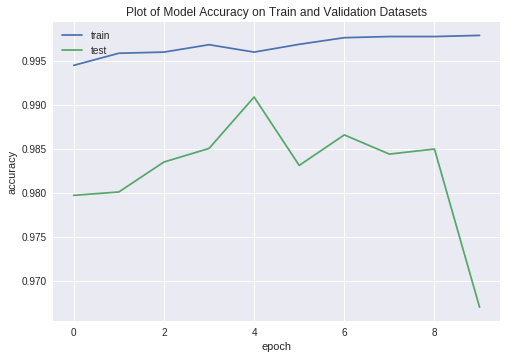

In [66]:
# list all data in history
print(r.history.keys())
# summarize history for accuracy
plt.plot(r.history['acc'])
plt.plot(r.history['val_acc'])
plt.title('Plot of Model Accuracy on Train and Validation Datasets')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Conclusion
From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on both datasets is still rising for the last few epochs. We can also see that the model has not yet over-learned the training dataset, showing comparable skill on both datasets.


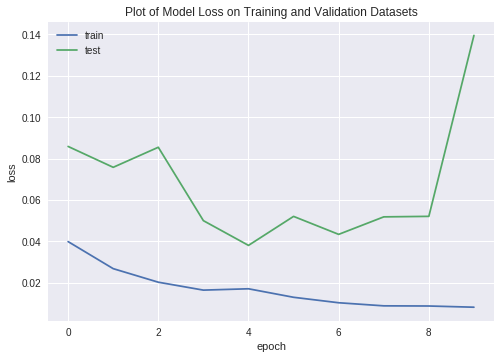

In [67]:
# summarize history for loss
plt.plot(r.history['loss'])
plt.plot(r.history['val_loss'])
plt.title('Plot of Model Loss on Training and Validation Datasets')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

From the plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test). If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.